In [1]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install Squiggle

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install fasta

Note: you may need to restart the kernel to use updated packages.


In [4]:
from Bio import SeqIO

# Open the file with UTF-8 encoding explicitly
with open('example.fasta', 'r', encoding='utf-8') as file:
    for sequence in SeqIO.parse(file, 'fasta'):
        print(sequence.id)
        print(sequence.seq)
        print(len(sequence))

In [5]:
pip install squiggle

Note: you may need to restart the kernel to use updated packages.


# Ordinal encoding DNA sequence data

In [6]:
import numpy as np
import re
def string_to_array(seq_string):
   seq_string = seq_string.lower()
   seq_string = re.sub('[^acgt]', 'n', seq_string)
   seq_string = np.array(list(seq_string))
   return seq_string
# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','c','g','t','z']))

LabelEncoder()

In [7]:
def ordinal_encoder(my_array):
   integer_encoded = label_encoder.transform(my_array)
   float_encoded = integer_encoded.astype(float)
   float_encoded[float_encoded == 0] = 0.25 # A
   float_encoded[float_encoded == 1] = 0.50 # C
   float_encoded[float_encoded == 2] = 0.75 # G
   float_encoded[float_encoded == 3] = 1.00 # T
   float_encoded[float_encoded == 4] = 0.00 # anything else, lets say n
   return float_encoded

In [8]:
seq_test = 'TTCAGCCAGTG'
ordinal_encoder(string_to_array(seq_test))

array([1.  , 1.  , 0.5 , 0.25, 0.75, 0.5 , 0.5 , 0.25, 0.75, 1.  , 0.75])

# One-hot encoding DNA Sequence

In [9]:
from sklearn.preprocessing import OneHotEncoder
def one_hot_encoder(seq_string):
   int_encoded = label_encoder.transform(seq_string)
   onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
   int_encoded = int_encoded.reshape(len(int_encoded), 1)
   onehot_encoded = onehot_encoder.fit_transform(int_encoded)
   onehot_encoded = np.delete(onehot_encoded, -1, 1)
   return onehot_encoded

In [10]:
seq_test = 'GAATTCTCGAA'
one_hot_encoder(string_to_array(seq_test))

C:\Users\Ritik\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [11]:
def Kmers_funct(seq, size):
   return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [12]:
mySeq = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
Kmers_funct(mySeq, size=7)

['gtgccca',
 'tgcccag',
 'gcccagg',
 'cccaggt',
 'ccaggtt',
 'caggttc',
 'aggttca',
 'ggttcag',
 'gttcagt',
 'ttcagtg',
 'tcagtga',
 'cagtgag',
 'agtgagt',
 'gtgagtg',
 'tgagtga',
 'gagtgac',
 'agtgaca',
 'gtgacac',
 'tgacaca',
 'gacacag',
 'acacagg',
 'cacaggc',
 'acaggca',
 'caggcag']

In [13]:
words = Kmers_funct(mySeq, size=6)
joined_sentence = ' '.join(words)
joined_sentence

'gtgccc tgccca gcccag cccagg ccaggt caggtt aggttc ggttca gttcag ttcagt tcagtg cagtga agtgag gtgagt tgagtg gagtga agtgac gtgaca tgacac gacaca acacag cacagg acaggc caggca aggcag'

In [14]:
mySeq1 = 'ATCGATCGATCGATCGATCGATCGATCGATCG'
mySeq2 = 'GATCGATCGATCGATCGATCGATCGATCGATC'
mySeq3 = 'TGCATGCATGCATGCATGCATGCATGCATGCA'
sentence1 = ' '.join(Kmers_funct(mySeq1, size=6))
sentence2 = ' '.join(Kmers_funct(mySeq2, size=6))
sentence3 = ' '.join(Kmers_funct(mySeq3, size=6))

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform([joined_sentence, sentence1, sentence2, sentence3]).toarray()

Load the Human NDA Sequence

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
human_dna = pd.read_table('Human_data.txt')

In [18]:
human_dna

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,0
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,6


In [19]:
dog_dna = pd.read_table('Dog_data.txt')
dog_dna.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [20]:
dog_dna

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0
...,...,...
815,ATGGTCGGTCCGGAGAAGGAGCAGAGCTGGATCCCTAAGATCTTCA...,5
816,ATGGCGGCGACGGTGGCTGCGGCGGCCGCCGACGCGGGGCCGGGGG...,6
817,ATGAGCTCGGCCGACAAGGCCCGGGTGGGGCCCGCGGCCGACGGGC...,6
818,GCCCCGAGGATGGGCAGGGTCCCGCTGGCCTGGTGCTTGGCGCTGT...,1


In [21]:
chimp_dna = pd.read_table('Chimp_data.txt')
chimp_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [22]:
#Let's define a function to collect all possible overlapping k-mers of a specified length from any sequence string.
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [23]:
#Now we can convert our training data sequences into short overlapping k-mers of legth 6. Lets do that for each species of data we have using our getKmers function.
human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)
chimp_dna['words'] = chimp_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)
dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)

In [24]:
#Since we are going to use scikit-learn natural language processing tools to do the k-mer counting, we need to now convert the lists of k-mers for each gene into #string sentences of words that the count vectorizer can use. We can also make a y variable to hold the class labels.
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = human_dna.iloc[:, 0].values # y_human for human_dna

In [25]:
#Now let's do the same for chimp and dog.
chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
#separate labels
y_chim = chimp_dna.iloc[:, 0].values # y_chim for chimp_dna

In [26]:
dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
#separate labels
y_dog = dog_dna.iloc[:, 0].values  # y_dog for dog_dna

In [27]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [28]:
print(X.shape)

(4380, 232414)


In [29]:
print(X_chimp.shape)
print(X_dog.shape)

(1682, 232414)
(820, 232414)


<Axes: xlabel='class'>

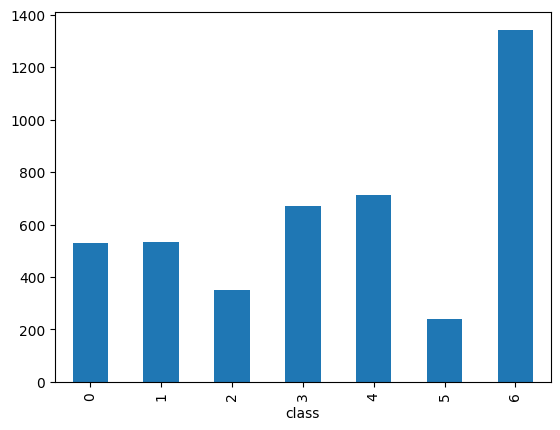

In [30]:
human_dna['class'].value_counts().sort_index().plot.bar()

<Axes: xlabel='class'>

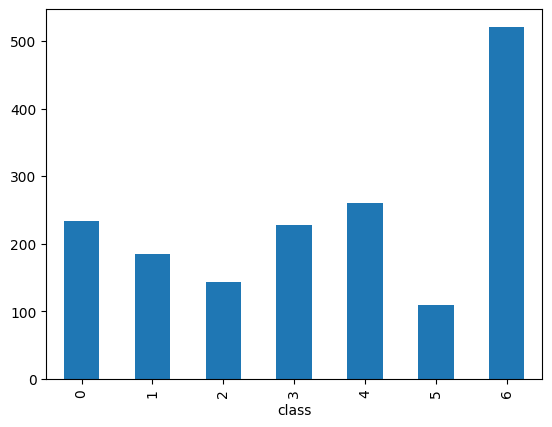

In [31]:
chimp_dna['class'].value_counts().sort_index().plot.bar()

<Axes: xlabel='class'>

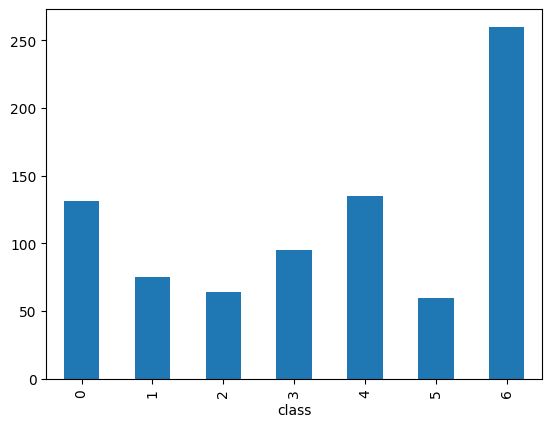

In [32]:
dog_dna['class'].value_counts().sort_index().plot.bar()

In [33]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_human, test_size = 0.20, random_state=42)

In [34]:
print(X_train.shape)

(3504, 232414)


In [35]:
print(X_test.shape)

(876, 232414)


In [36]:
### Multinomial Naive Bayes Classifier ###
# The alpha parameter was determined by grid search previously
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [37]:
#Now let's make predictions on the human hold out test set and see how it performes on unseen data.

y_pred = classifier.predict(X_test)

In [38]:
"""
Okay, so let's look at some model performce metrics like the confusion matrix, accuracy, precision, recall and f1 score. We are getting really good results on our unseen data, so it looks like our model did not overfit to the training data. In a real project I would go back and sample many more train test splits since we have a relatively small data set.

"""
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263


In [39]:
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


In [40]:
"""
Now for the real test. Let's see how our model perfoms on the DNA sequences from other species. First we'll try the Chimpanzee, which we would expect to be very similar to human. Then we will try man's (and woman's) best friend, the Dog DNA sequences.
"""
#Make predictions for the Chimp and dog sequences¶

"\nNow for the real test. Let's see how our model perfoms on the DNA sequences from other species. First we'll try the Chimpanzee, which we would expect to be very similar to human. Then we will try man's (and woman's) best friend, the Dog DNA sequences.\n"

In [41]:
# Predicting the chimp, dog and worm sequences
y_pred_chimp = classifier.predict(X_chimp)
y_pred_dog = classifier.predict(X_dog)

In [42]:
# performance on chimp genes
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_chim, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.993 
precision = 0.994 
recall = 0.993 
f1 = 0.993


In [43]:
# performance on dog genes
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0   1   2   3    4   5    6
Actual                                  
0          127   0   0   0    0   0    4
1            0  63   0   0    1   0   11
2            0   0  49   0    1   0   14
3            1   0   0  81    2   0   11
4            4   0   0   1  126   0    4
5            4   0   0   0    1  53    2
6            0   0   0   0    0   0  260
accuracy = 0.926 
precision = 0.934 
recall = 0.926 
f1 = 0.925


# Cancer Prediction

In [47]:
# import the data 
cancer = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Cancer.csv')

In [48]:
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [49]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [50]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [51]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# define target (y) and features (X)

In [52]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [53]:
y = cancer['diagnosis']

In [54]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [55]:
X = cancer.drop(['id','diagnosis','Unnamed: 32'],axis=1)

In [56]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# train test split

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

In [58]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

# Select Model

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)

In [60]:
model

LogisticRegression(max_iter=5000)

# Train of fit model

In [61]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [62]:
model.intercept_

array([-29.72686023])

In [63]:
model.coef_

array([[-0.89663891, -0.18546254,  0.24777555, -0.02517439,  0.14127358,
         0.18993189,  0.40993333,  0.22131658,  0.17342494,  0.03255993,
         0.00280147, -1.19305069, -0.18136732,  0.12415426,  0.02391141,
        -0.05381337,  0.01419985,  0.02888271,  0.03006595, -0.01496123,
        -0.27456646,  0.44508637,  0.1778569 ,  0.01188917,  0.29075087,
         0.58943513,  1.04676137,  0.45018436,  0.53199644,  0.07519358]])

# Predict Model

In [64]:
y_pred = model.predict(X_test)

In [65]:
y_pred

array(['B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B'], dtype=object)

# Model Accuracy

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [67]:
confusion_matrix(y_test,y_pred)

array([[97,  5],
       [ 2, 67]], dtype=int64)

In [68]:
accuracy_score(y_test,y_pred)

0.9590643274853801

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.98      0.95      0.97       102
           M       0.93      0.97      0.95        69

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

